# Decision Tree Practice
### In this Jupyter notebook, I am going to develop a Decision Tree Machine Learning Model from Chapter 6 in Hands-On Machine Learning with Scikit-Learn and TensorFlow by Aurelien Geron (pg 186 - 187)

In [3]:
import numpy as np
import sklearn
from sklearn import datasets

Generating a random set of data using the make_moons dataset and adding some noise to it to build the model from. This set generates a sample of X values with a y class membership of 0 or 1.

In [42]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 10000, noise = 0.4)

Graphing the data to see the two different groups.

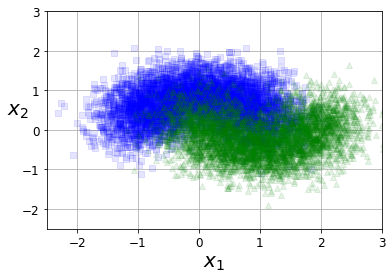

In [69]:
import matplotlib.pyplot as plt

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", alpha = 0.1)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", alpha = 0.1)
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-2.5, 3, -2.5, 3])
plt.show()

Splitting the data that was generated into a training (80%) and testing (20%) set.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

Creating a dictionary of parameters that I will use on a cross_validation to find the best parameters for the model.

In [16]:
param_grid = {
    'max_leaf_nodes': list(range(2, 100)),
    'min_samples_split': [2, 3, 4]
}

Instantiating a an object of GridSearchCV class then fitting it to the training data and finding best parameters.

In [17]:
optimal_clf = GridSearchCV(DecisionTreeClassifier(random_state = 0), param_grid, verbose = 1)
optimal_clf.fit(X_train, y_train)
optimal_clf.best_params_

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1470 out of 1470 | elapsed:    3.2s finished


{'max_leaf_nodes': 21, 'min_samples_split': 2}

Graphing out the decision boundaries for the two different groups.

In [71]:
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=1, cmap=custom_cmap)


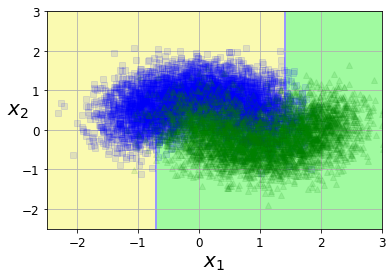

In [72]:
plot_dataset(X, y, [-2.5, 3, -2.5, 3])


plot_decision_boundary(optimal_clf, X, y, axes=[-2.5, 3, -2.5, 3])

Making predictions off the test data and finding the accuracy, precision and recall scores.

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

y_pred = optimal_clf.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
prec_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)

print('Accuracy=%s' % (acc_score))
print('Precision=%s' % (prec_score))
print('Recall=%s' % (recall_score))

Accuracy=0.851375
Precision=0.8423357664233576
Recall=0.8648513614788909
